# Assignment 2

In [1]:
Name=input('Name:')
ID=input('Student ID:')

Name:Weixiu Shao
Student ID:s2825336


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

## Questions 1-5
* Use data from **GF500_2015.xlsx** to do Questions 1-5. Note that, Revenues & Profits are in Millions (USD). Global Rank is done by Revenues.

In [3]:
gf=pd.read_excel('GF500_2015.xlsx')
gf=gf.set_index("Global Rank")
gf.head()

,Company Name,Sector,HQ Location,Revenues,Profits,Employees
Global Rank,,,,,,
1,Walmart,Retailing,"Bentonville, AR",485651,16363.0,2200000
2,Sinopec Group,Energy,"Beijing, China",446811,5177.0,897488
3,Royal Dutch Shell,Energy,"The Hague, Netherlands",431344,14874.0,94000
4,China National Petroleum,Energy,"Beijing, China",428620,16359.0,1636532
5,Exxon Mobil,Energy,"Irving, TX",382597,32520.0,83700


In [4]:
gf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1 to 500
Data columns (total 6 columns):
Company Name    500 non-null object
Sector          500 non-null object
HQ Location     500 non-null object
Revenues        500 non-null int64
Profits         500 non-null float64
Employees       500 non-null int64
dtypes: float64(1), int64(2), object(3)
memory usage: 27.3+ KB


### Q1: Find the number of GF500-companies in each Sector. How many sectors? (1 mark)

In [5]:
# output a pandas serie of counts of each sectors
gf.groupby('Sector').count()['Company Name']

Sector
Aerospace & Defense              11
Apparel                           3
Chemicals                         8
Energy                          107
Engineering & Construction       13
Financials                      111
Food & Drug Stores               20
Food, Beverages & Tobacco        16
Health Care                      23
Hotels, Resturants & Leisure      5
Household Products                2
Industrials                      19
Materials                        20
Media                             4
Motor Vehicles & Parts           34
Retailing                        15
Technology                       32
Telecommunications               18
Transportation                   20
Wholesalers                      19
Name: Company Name, dtype: int64

In [6]:
len(gf['Sector'].unique())
# there are 20 unique sectors

20

**Answer: There are 20 unique sectors**


### Q2: Find the total number of employees of each sector. Make a bar plot (in one graph) of the total number by sector. (1 mark)

In [7]:
# output a pandas serie of total counts of employees of each sector
total_emp = gf.groupby('Sector').sum()['Employees']
total_emp

Sector
Aerospace & Defense              1865669
Apparel                           287029
Chemicals                         569006
Energy                          10962253
Engineering & Construction       2307845
Financials                      10226768
Food & Drug Stores               3925956
Food, Beverages & Tobacco        1959824
Health Care                      1831347
Hotels, Resturants & Leisure     1462920
Household Products                196611
Industrials                      2716805
Materials                        2278490
Media                             266158
Motor Vehicles & Parts           5185211
Retailing                        5497249
Technology                       5481534
Telecommunications               2891955
Transportation                   4468942
Wholesalers                      1022832
Name: Employees, dtype: int64

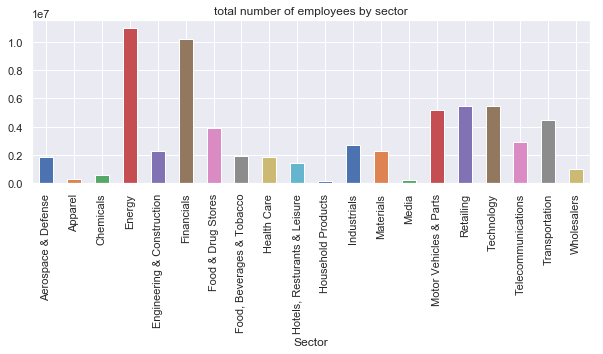

In [8]:
# plot the above serie
total_emp.plot(kind='bar', title='total number of employees by sector', figsize=(10,3))

### Q3: Obtain the scatterplot & linear fit of Profits (y-axis) against Revenues (x-axis) in one graph of the following sectors - Telecommunications, Energy and Transportation. Comment briefly on the relationship between Profits and Revenues as shown in the graph.(1 mark) 

In [9]:
# use .loc to filter the perform data frame selection
temp_data = gf.loc[(gf["Sector"] == 'Telecommunications') | (gf["Sector"] == 'Energy') | (gf["Sector"]=='Transportation'), :]

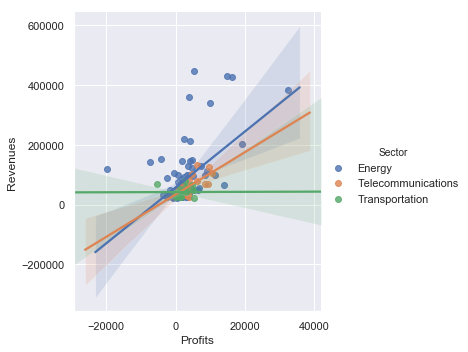

In [53]:
# plot the relationship between profits and revenues for three different sectors
sns.lmplot(x='Profits', y='Revenues', data=temp_data, hue = 'Sector')

**Comments: There is a fairly strong positive linear relationship between Profits and Revenues for both Energy and Telecommunications. There is a very weak or no linear relationship between Profits and Revenues for sector Transportation.**

### Q4: Find the box plot of Profits in one graph of the following sectors - Technology, Telecommunications, Materials & Financials. Comment briefly on the results. (1 mark)

In [11]:
# use .loc to filter the perform data frame selection
temp_data2 = gf.loc[(gf["Sector"] == 'Telecommunications') | (gf["Sector"] == 'Technology') | (gf["Sector"]=='Materials') | (gf["Sector"]=='Financials'), :]

Text(0.5, 1.0, "Boxplot For Different Sectors' Profits")

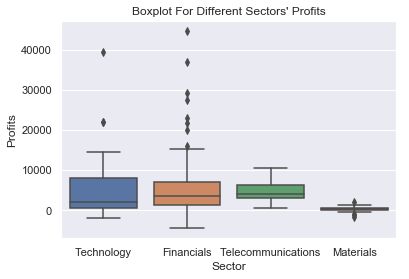

In [12]:
sns.boxplot(x=temp_data2['Sector'], y=temp_data2['Profits']).set_title("Boxplot For Different Sectors' Profits")

**Comments: From the boxplot, we can conclude that the IQR (Q3-Q1) for Technology is large and the IQR for Materials is small. There are 2 outliers for Technology profits. There are many outliers for Financials. The line in the box shows the median of the sector profit, and Telecommunications has the highest median.**

### Q5: Find the top 15 cities & countries (in terms of firm numbers) hosting GF500 HQ's. (3 marks)
This is a very challenging question. Apart from the following hints, no further tips will be provided. Attempt the answers by yourself. Good luck!
* Hint 1: Split HQ Location by ', ' (, *space*) into city & country (see Topic 4 - E-commerce) & add them in gf as two new columns. 
* Hint 2: There's an issue about the country column: for **US** firms, only **states** are located (so, need to change CA, TX, NY, ..., to USA). The good news is that all US states are with length equal  to 2 & all other countries are with longer names. 

In [13]:
# split the location and use expand tab to make the output a data frame and add the result to the original data frame
temp_data3 = gf['HQ Location'].str.split(', ',expand=True)
#reset the index Global rank
temp_data4 = temp_data3.reset_index()

In [14]:
# create a list and loop through the column 1 with condition to generate a list of new country entry
country_list = []
for country in temp_data3[1]:
    if len(country) == 2:
        country = 'US'
        country_list.append(country)
    else:
        country_list.append(country)


In [15]:
# transfrom the newly created list to data frame and add it to the temp_data4
temp_data4['country'] = pd.DataFrame(country_list)

In [16]:
# drop the old 1 column from temp_data4 
temp_data4 = temp_data4.drop(temp_data4.iloc[:,[2]],axis=1)


In [17]:
temp_data5 = temp_data4.rename(columns={'Global Rank':'Global Rank',0:'city', 'country':'country'})
temp_data5.head()

,Global Rank,city,country
0,1,Bentonville,US
1,2,Beijing,China
2,3,The Hague,Netherlands
3,4,Beijing,China
4,5,Irving,US


In [18]:
# set the index to Global Rank and add the temp_data5 to the orginal data frame
temp_data6=temp_data5.set_index('Global Rank')
new_gf = gf.join(temp_data6, on='Global Rank', lsuffix='a', rsuffix='b')

In [19]:
# the final output 
# the top 15 cities and countries hosting GF500
new_gf.groupby(['city', 'country']).count().sort_values('Company Name', ascending=False).head(15)

,,Company Name,Sector,HQ Location,Revenues,Profits,Employees
city,country,,,,,,
Beijing,China,51,51,51,51,51,51
Tokyo,Japan,38,38,38,38,38,38
London,Britain,19,19,19,19,19,19
Paris,France,18,18,18,18,18,18
New York,US,17,17,17,17,17,17
Seoul,South Korea,13,13,13,13,13,13
Houston,US,9,9,9,9,9,9
Osaka,Japan,8,8,8,8,8,8
Shanghai,China,8,8,8,8,8,8


## Questions 6-10
* Use data from **returns.xlsx** to do Questions 6-10. 
* The dataset returns.xlsx contains 10 daily stock returns (in terms of percentage) from 2015 to 2017, including **Apple (AAPL), Amazon (AMZN), Cisco (CSCO), Dell (DELL), Facebook (FB), Google (GOOG), IBM (IBM), Intel (INTC), Microsoft (MSFT), Oracle (ORCL)**.
* For example, on 05-January-2015, Apple's stock dropped by 2.817% (from the previous trading day).

In [20]:
import datetime
returns0=pd.read_excel('returns.xlsx')
returns=returns0.iloc[1:,:]
returns.loc['Date'] = pd.to_datetime(returns['Date'])
returns=returns.set_index('Date')
returns.head()

,AAPL_R,AMZN_R,CSCO_R,EBAY_R,FB_R,GOOG_R,IBM_R,INTC_R,MSFT_R,ORCL_R
Date,,,,,,,,,,
2015-01-05,-2.817159,-2.051731,-1.992032,-0.845045,-1.606119,-2.084564,-1.573491,-1.127613,-0.930282,-1.669298
2015-01-06,0.009412,-2.283332,-0.036955,-1.282856,-1.347325,-2.317707,-2.156605,-1.863700,-1.457097,-1.032347
2015-01-07,1.402221,1.059975,0.924214,-0.172664,0.000000,-0.171328,-0.653553,2.097506,1.270537,0.023180
2015-01-08,3.842227,0.683600,0.769231,2.703687,2.659225,0.315306,2.173492,1.860078,2.941813,0.602549
2015-01-09,0.107248,-1.174865,1.017812,-1.382734,-0.556444,-1.295058,0.435551,0.190788,-0.840513,-0.046072


### Q6: Use describe() to describe the 10 daily returns. Which company performs the best/worst in mean returns? Which company is the most/least volatile? Which company profits/loses the most in one day during 2015-2017? (1 mark)

In [21]:
returns.describe()

,AAPL_R,AMZN_R,CSCO_R,EBAY_R,FB_R,GOOG_R,IBM_R,INTC_R,MSFT_R,ORCL_R
count,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000
mean,0.068463,0.192993,0.051830,-0.003441,0.119179,0.101488,-0.000023,0.041015,0.090318,0.016149
std,1.444991,1.803272,1.296094,2.637907,1.523982,1.414495,1.204253,1.364462,1.424117,1.232358
min,-6.570657,-7.609979,-7.242093,-56.901493,-5.810481,-5.317860,-5.859601,-9.102016,-9.253350,-7.671908
25%,-0.570426,-0.644914,-0.535591,-0.695866,-0.553185,-0.521019,-0.612539,-0.671716,-0.515975,-0.527373
50%,0.043818,0.104309,0.032765,0.049570,0.089206,0.056639,0.022751,0.075453,0.031128,0.024349
75%,0.797788,0.961005,0.727995,0.859700,0.969067,0.745723,0.616384,0.746511,0.711054,0.593066
max,6.496328,14.131132,9.640160,13.919868,15.521440,16.052427,8.864474,7.376058,10.452238,8.568962


In [22]:
returns.mean().max()

0.1929932493105508

**Answer:
Amazon has the highest mean returns**

In [23]:
returns.mean().min()

-0.0034408884715439107

**Answer:
According to the table, EBAY performs worst in mean returns**

In [24]:
returns.std().max()

2.6379073498292436

**Answer: 
According to the table, Ebay has the highest standard deviation which means Ebay is the most Volatile firm**

In [25]:
returns.std().min()

1.204253499414627

**Answer:
IBM has the lowest standard deviation which means IBM is the most stable firm**

In [26]:
returns.max()

AAPL_R     6.496328
AMZN_R    14.131132
CSCO_R     9.640160
EBAY_R    13.919868
FB_R      15.521440
GOOG_R    16.052427
IBM_R      8.864474
INTC_R     7.376058
MSFT_R    10.452238
ORCL_R     8.568962
dtype: float64

In [27]:
returns.min()

AAPL_R    -6.570657
AMZN_R    -7.609979
CSCO_R    -7.242093
EBAY_R   -56.901493
FB_R      -5.810481
GOOG_R    -5.317860
IBM_R     -5.859601
INTC_R    -9.102016
MSFT_R    -9.253350
ORCL_R    -7.671908
dtype: float64

**Answer:From the above result and also the describe table, we can see that google earns the most (16%) in one day, while Ebay lose the most in one day(-56.9%)**

### Q7: Make a line plot of the following returns: GOOG, IBM & EBAY, in one graph. Find the best day (with the largest positive return) & the worst day (with the largest negative return) for each of the 3 firms. (2 marks)

In [28]:
returns.head()

,AAPL_R,AMZN_R,CSCO_R,EBAY_R,FB_R,GOOG_R,IBM_R,INTC_R,MSFT_R,ORCL_R
Date,,,,,,,,,,
2015-01-05,-2.817159,-2.051731,-1.992032,-0.845045,-1.606119,-2.084564,-1.573491,-1.127613,-0.930282,-1.669298
2015-01-06,0.009412,-2.283332,-0.036955,-1.282856,-1.347325,-2.317707,-2.156605,-1.863700,-1.457097,-1.032347
2015-01-07,1.402221,1.059975,0.924214,-0.172664,0.000000,-0.171328,-0.653553,2.097506,1.270537,0.023180
2015-01-08,3.842227,0.683600,0.769231,2.703687,2.659225,0.315306,2.173492,1.860078,2.941813,0.602549
2015-01-09,0.107248,-1.174865,1.017812,-1.382734,-0.556444,-1.295058,0.435551,0.190788,-0.840513,-0.046072


Text(0.5, 1.0, 'Returns of Google, IBM, and Ebay')

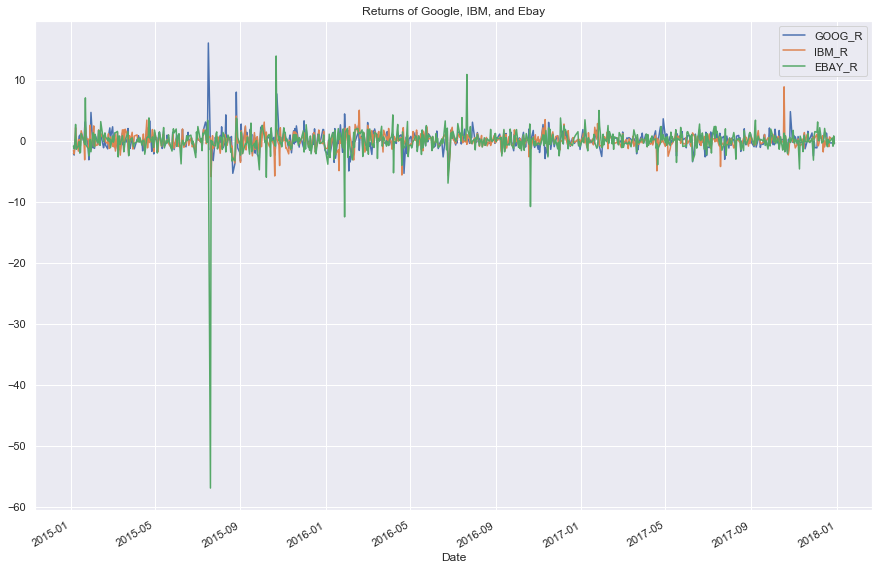

In [29]:
returns.plot(y=['GOOG_R', 'IBM_R', 'EBAY_R'], kind='line', figsize=(15,10))
plt.title('Returns of Google, IBM, and Ebay')

In [30]:
returns.idxmax()

AAPL_R   2016-07-27
AMZN_R   2015-04-24
CSCO_R   2016-02-11
EBAY_R   2015-10-22
FB_R     2016-01-28
GOOG_R   2015-07-17
IBM_R    2017-10-18
INTC_R   2017-10-27
MSFT_R   2015-04-24
ORCL_R   2017-06-22
dtype: datetime64[ns]

In [31]:
returns.idxmin()

AAPL_R   2016-01-27
AMZN_R   2016-01-29
CSCO_R   2017-05-18
EBAY_R   2015-07-20
FB_R     2016-02-05
GOOG_R   2016-04-22
IBM_R    2015-07-21
INTC_R   2016-01-15
MSFT_R   2015-01-27
ORCL_R   2017-09-15
dtype: datetime64[ns]

**Answer:
The largest return date for google is 2015-07-17. The worst date for google is 2016-04-22.
The best day for IBM is 2017-10-18. The worst day for IBM is 2015-07-21.
The best day for Ebay is 2015-10-22. The worst day for Ebay is 2015-07-20.**

### Q8: Find the most right-skewed, left-skewed & least-skewed firms. Get the histogram of these firms in separate plots. Comment on whether the plots agree the skewness measures. (1 mark)

In [32]:
returns.skew()

AAPL_R    -0.012260
AMZN_R     1.929355
CSCO_R     0.476814
EBAY_R   -13.331531
FB_R       1.174783
GOOG_R     2.148020
IBM_R     -0.103694
INTC_R    -0.217430
MSFT_R     0.541799
ORCL_R    -0.079193
dtype: float64

In [33]:
# find the most right-skewed firm
returns.skew().idxmax()

'GOOG_R'

In [34]:
# find the most left-skewed firm
returns.skew().idxmin()

'EBAY_R'

In [35]:
# find the least-skew firm
returns.skew().abs().idxmin()

'AAPL_R'

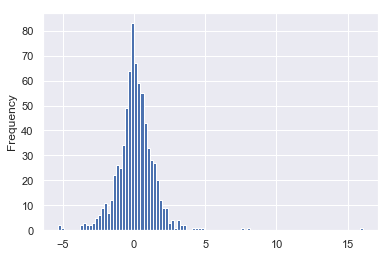

In [36]:
# histogram of Google
returns['GOOG_R'].plot(kind='hist',bins=100)

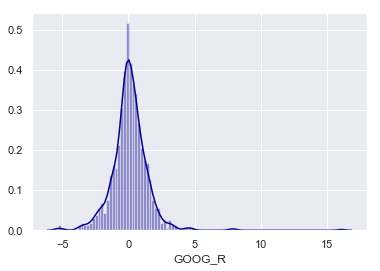

In [54]:
# histogram of Google using sns
sns.distplot(returns['GOOG_R'],bins=100,color='darkblue')

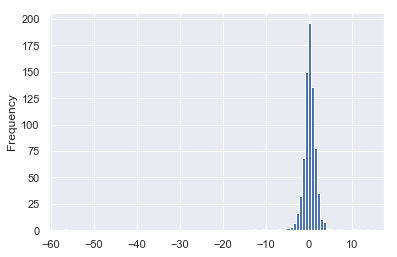

In [38]:
# histogram of Ebay
returns['EBAY_R'].plot(kind='hist',bins=100)

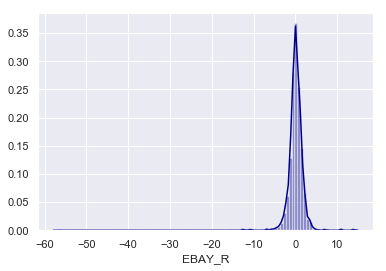

In [39]:
# histogram of Ebay using sns
sns.distplot(returns['EBAY_R'],bins=100,color='darkblue')

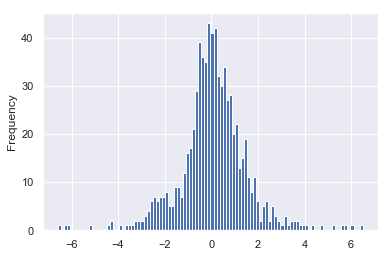

In [40]:
# histogram of Apple
returns['AAPL_R'].plot(kind='hist',bins=100)

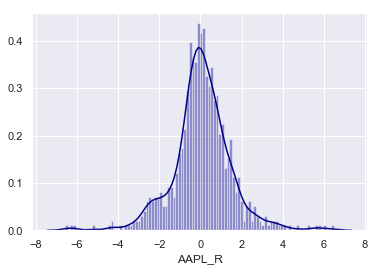

In [41]:
# histogram of Apple using sns
sns.distplot(returns['AAPL_R'],bins=100,color='darkblue')

**Comments: The most right-skewed firm is Google. The most left-skewed firm is Ebay. The least skewed firm is Apple.  The Histogram of Google has long right tail. The Histogram of Ebay has long left tail. The histogram of Apple dont have clear direction of skewness on either side. The histograms of the three firms support this conclusion.**


### Q9: Find the number of outliers of Apple (AAPL) during 2015-2017. Do the same for Facebook (FB).(3 marks)
* This question is somewhat challenging.
* Hint: A convenient definition of an outlier is a point which falls more than 1.5 times the interquartile range above the third quartile or below the first quartile.

In [42]:
# calculate the 1.5 * IQR + Q3
upper_bound = returns['AAPL_R'].quantile(0.75) + (returns['AAPL_R'].quantile(0.75) - returns['AAPL_R'].quantile(0.25)) * 1.5
upper_bound

2.850109212003027

In [43]:
# calculate the Q1 - 1.5 * IQR
lower_bound = returns['AAPL_R'].quantile(0.25) - (returns['AAPL_R'].quantile(0.75) - returns['AAPL_R'].quantile(0.25))* 1.5
lower_bound

-2.622746527640618

In [44]:
returns[returns['AAPL_R']>upper_bound].count()

AAPL_R    23
AMZN_R    23
CSCO_R    23
EBAY_R    23
FB_R      23
GOOG_R    23
IBM_R     23
INTC_R    23
MSFT_R    23
ORCL_R    23
dtype: int64

In [45]:
returns[returns['AAPL_R']<lower_bound].count()

AAPL_R    24
AMZN_R    24
CSCO_R    24
EBAY_R    24
FB_R      24
GOOG_R    24
IBM_R     24
INTC_R    24
MSFT_R    24
ORCL_R    24
dtype: int64

**Answer: There are totally 23 + 24 = 47 outliers for APPLE.**

In [46]:
# calculate the 1.5 * IQR + Q3
upper_bound = returns['FB_R'].quantile(0.75) + (returns['FB_R'].quantile(0.75) - returns['FB_R'].quantile(0.25)) * 1.5
upper_bound

3.252445569475432

In [47]:
# calculate the Q1 - 1.5 * IQR
lower_bound = returns['FB_R'].quantile(0.25) - (returns['FB_R'].quantile(0.75) - returns['FB_R'].quantile(0.25))* 1.5
lower_bound

-2.836562963622985

In [48]:
returns[returns['FB_R']>upper_bound].count()

AAPL_R    14
AMZN_R    14
CSCO_R    14
EBAY_R    14
FB_R      14
GOOG_R    14
IBM_R     14
INTC_R    14
MSFT_R    14
ORCL_R    14
dtype: int64

In [49]:
returns[returns['FB_R']<lower_bound].count()

AAPL_R    22
AMZN_R    22
CSCO_R    22
EBAY_R    22
FB_R      22
GOOG_R    22
IBM_R     22
INTC_R    22
MSFT_R    22
ORCL_R    22
dtype: int64

**There are totally 14+22 = 36 outliers for Facebook**

### Q10: Compute the pairwise correlation among the 10 returns. Plot the heatmap based on these correlations. Which firm tends to be most positively correlated with others?(1 mark)

In [50]:
returns_correlation=returns.corr()

In [51]:
returns_correlation

,AAPL_R,AMZN_R,CSCO_R,EBAY_R,FB_R,GOOG_R,IBM_R,INTC_R,MSFT_R,ORCL_R
AAPL_R,1.000000,0.384333,0.416367,0.176198,0.465836,0.421804,0.321409,0.425079,0.495491,0.392465
AMZN_R,0.384333,1.000000,0.309090,0.148414,0.559301,0.599161,0.232046,0.303422,0.528767,0.297432
CSCO_R,0.416367,0.309090,1.000000,0.224675,0.300238,0.350945,0.435761,0.511789,0.499788,0.496770
EBAY_R,0.176198,0.148414,0.224675,1.000000,0.092791,0.248785,0.204088,0.224224,0.235872,0.256084
FB_R,0.465836,0.559301,0.300238,0.092791,1.000000,0.603077,0.269136,0.366426,0.496681,0.356962
GOOG_R,0.421804,0.599161,0.350945,0.248785,0.603077,1.000000,0.334792,0.367460,0.586468,0.357760
IBM_R,0.321409,0.232046,0.435761,0.204088,0.269136,0.334792,1.000000,0.438442,0.416349,0.498894
INTC_R,0.425079,0.303422,0.511789,0.224224,0.366426,0.367460,0.438442,1.000000,0.555015,0.447199
MSFT_R,0.495491,0.528767,0.499788,0.235872,0.496681,0.586468,0.416349,0.555015,1.000000,0.493768
ORCL_R,0.392465,0.297432,0.496770,0.256084,0.356962,0.357760,0.498894,0.447199,0.493768,1.000000


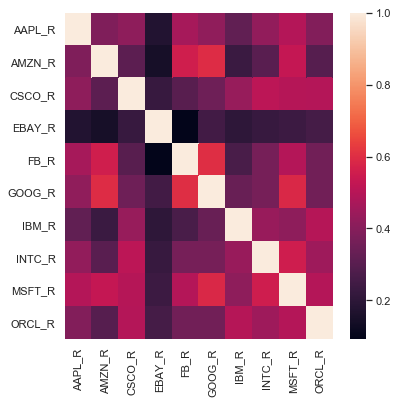

In [57]:
# correlation heatmap
plt.figure(figsize=(6,6))
sns.heatmap(returns_correlation)

**Comments:
From the heat map, Microsoft seems to have the most light color blocks. Microsoft tends to be the most correlated firm with others.**

# Good Luck!